В исследованиях используется Dataset "Electric Power Consumption" https://www.kaggle.com/datasets/fedesoriano/electric-power-consumption

In [18]:
import numpy as np
import pandas as pd
import seaborn as sns
sns.set(rc = {'figure.figsize':(15,8)})
from datetime import datetime
from matplotlib import pyplot as plt
import scipy.stats as stat
from outliers import smirnov_grubbs as grubbs
from sklearn.metrics import r2_score
from statsmodels.stats.diagnostic import lilliefors
from statsmodels.stats.power import TTestIndPower
from statsmodels.stats.power import TTestPower
from statsmodels.stats.contingency_tables import mcnemar
from cmh import CMH
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [2]:
data = pd.read_csv("powerconsumption.csv")
# удалим ненужные столбцы
data = data.drop(columns=["PowerConsumption_Zone2", "PowerConsumption_Zone3", "GeneralDiffuseFlows", "DiffuseFlows"], 
            axis=1)
data["Datetime"] = pd.to_datetime(data["Datetime"])
# сделаем шаг в выборке не 10 минут, а 1 день и усредним соотсветствующие значения
data = (data.groupby(pd.Grouper(key='Datetime', freq='D')).mean())
data

Temperature   Humidity  WindSpeed  PowerConsumption_Zone1
Datetime                                                             
2017-01-01     9.675299  68.519306   0.315146            28465.232067
2017-01-02    12.476875  71.456319   0.076563            28869.493671
2017-01-03    12.100000  74.981667   0.076715            30562.447257
2017-01-04    10.509479  75.459792   0.082417            30689.831224
2017-01-05    10.866444  71.040486   0.083896            30802.911393
...                 ...        ...        ...                     ...
2017-12-26    11.621840  69.070903   0.083062            30013.476975
2017-12-27    15.232917  59.445903   0.082028            29966.962399
2017-12-28    13.662361  62.839375   0.081354            30267.004647
2017-12-29    12.990486  49.078750   0.078181            29209.632446
2017-12-30    11.688993  51.361667   0.078174            28145.669624

[364 rows x 4 columns]

## 1 Реализовать аппроксимацию распределений данных с помощью ядерных оценок.

In [3]:
df = data[["PowerConsumption_Zone1"]]
df

PowerConsumption_Zone1
Datetime                          
2017-01-01            28465.232067
2017-01-02            28869.493671
2017-01-03            30562.447257
2017-01-04            30689.831224
2017-01-05            30802.911393
...                            ...
2017-12-26            30013.476975
2017-12-27            29966.962399
2017-12-28            30267.004647
2017-12-29            29209.632446
2017-12-30            28145.669624

[364 rows x 1 columns]

In [4]:
df.to_csv('task1.csv', index = True) # экспортирую данные, чтобы использовать их на R

<AxesSubplot:xlabel='Datetime'>

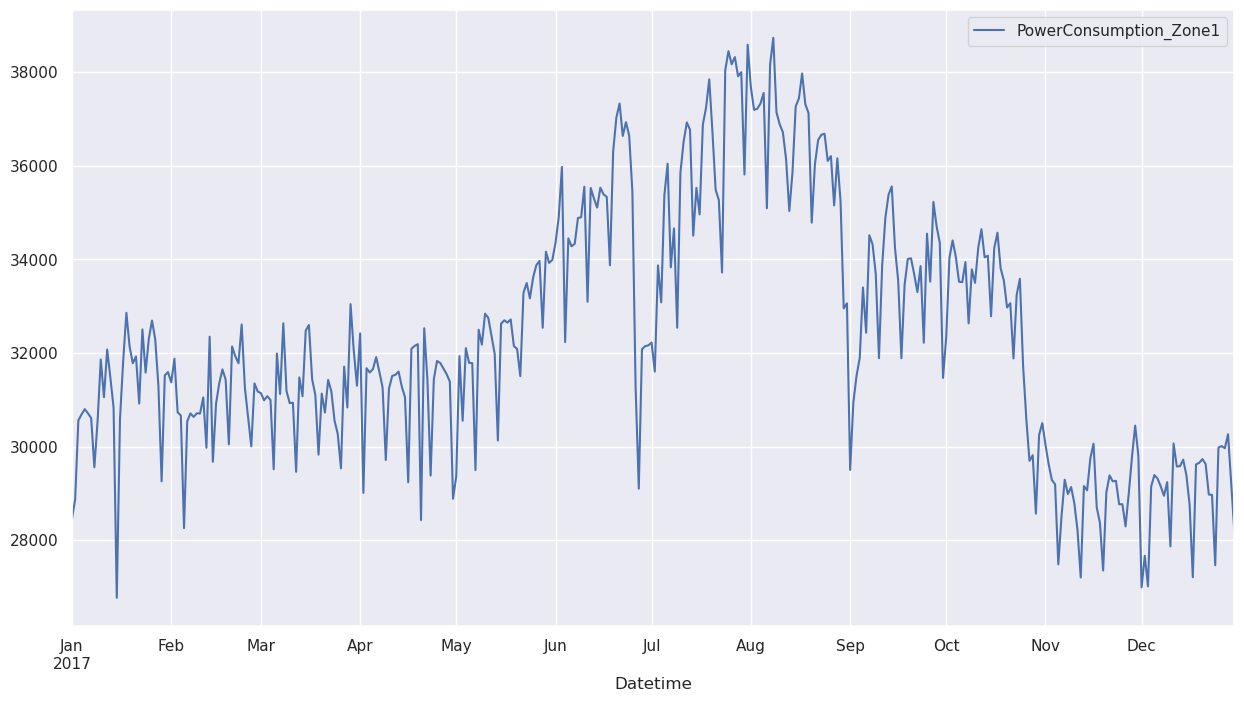

In [5]:
df.plot()

<AxesSubplot:xlabel='PowerConsumption_Zone1', ylabel='Density'>

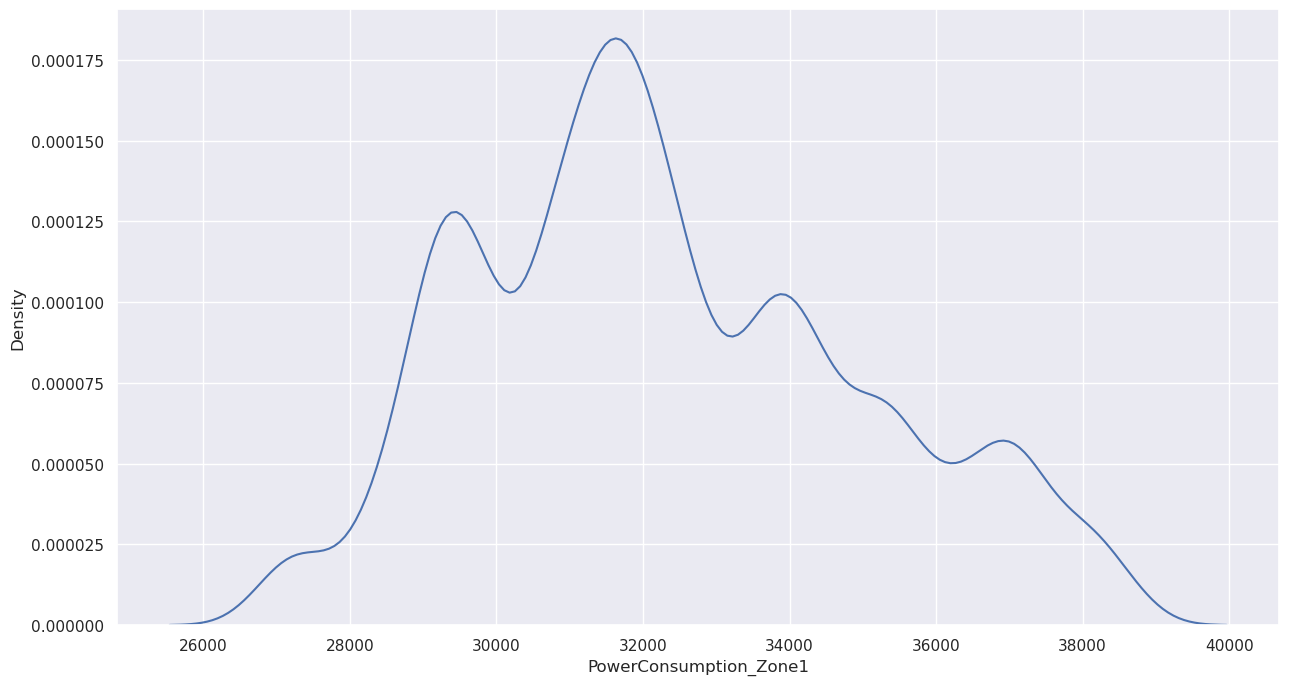

In [6]:
sns.kdeplot(df["PowerConsumption_Zone1"], bw_adjust=0.5)

## 2 Реализовать анализ данных с помощью cdplot, dotchart, boxplot и stripchart.

### cdplot

In [7]:
df = data #используем всё тот же исходный датасет
df.loc[df["Temperature"] >= 20, "Indicator"] = "temp >= 20"
df.loc[df["Temperature"] < 20, "Indicator"] = "temp < 20"
df

Temperature   Humidity  WindSpeed  PowerConsumption_Zone1  \
Datetime                                                                
2017-01-01     9.675299  68.519306   0.315146            28465.232067   
2017-01-02    12.476875  71.456319   0.076563            28869.493671   
2017-01-03    12.100000  74.981667   0.076715            30562.447257   
2017-01-04    10.509479  75.459792   0.082417            30689.831224   
2017-01-05    10.866444  71.040486   0.083896            30802.911393   
...                 ...        ...        ...                     ...   
2017-12-26    11.621840  69.070903   0.083062            30013.476975   
2017-12-27    15.232917  59.445903   0.082028            29966.962399   
2017-12-28    13.662361  62.839375   0.081354            30267.004647   
2017-12-29    12.990486  49.078750   0.078181            29209.632446   
2017-12-30    11.688993  51.361667   0.078174            28145.669624   

            Indicator  
Datetime               
2017-01-01  temp < 20  
2017-01-02  temp < 20  
2017-01-03  temp < 20  
2017-01-04  temp < 20  
2017-01-05  temp < 20  
...               ...  
2017-12-26  temp < 20  
2017-12-27  temp < 20  
2017-12-28  temp < 20  
2017-12-29  temp < 20  
2017-12-30  temp < 20  

[364 rows x 5 columns]

In [8]:
df.to_csv('task2_cdplot.csv', index = True) # экспортирую данные, чтобы использовать их на R

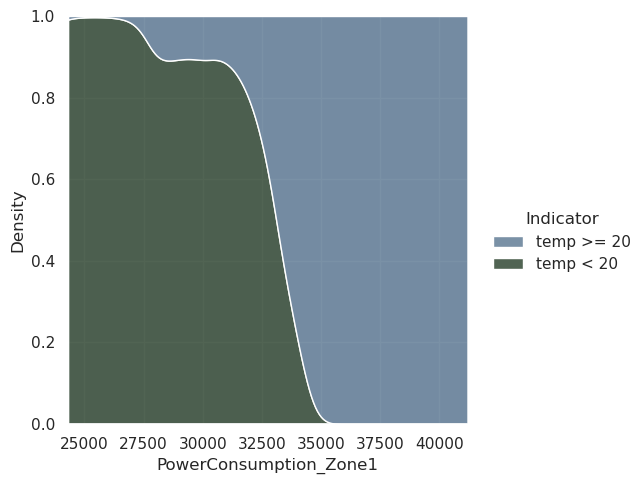

In [9]:
sns.displot(data = df, x = "PowerConsumption_Zone1", hue = "Indicator", hue_order = ["temp >= 20", "temp < 20"],
            kind="kde", multiple="fill", palette="ch:rot=1,hue=-0.7,light=0.4")

### dotchart

<AxesSubplot:xlabel='Datetime', ylabel='Temperature'>

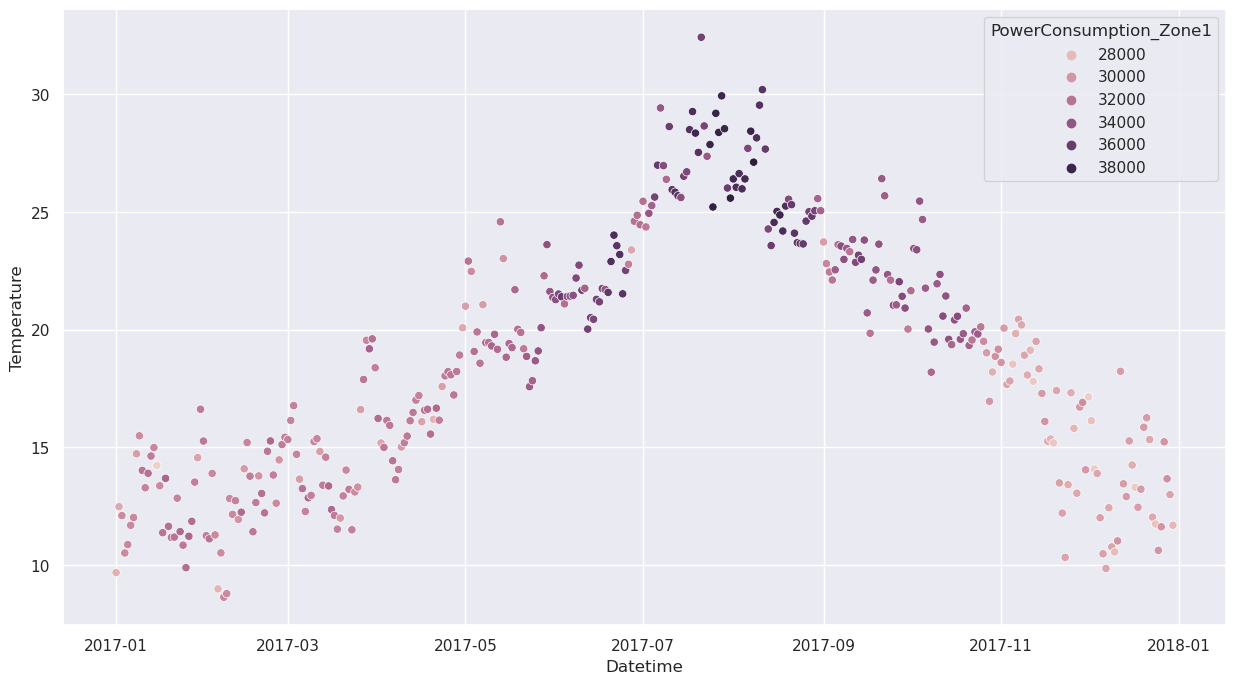

In [10]:
sns.scatterplot(data=data, x="Datetime", y="Temperature", hue="PowerConsumption_Zone1") 

### boxplot

In [11]:
# разобьём год на кварталы
df.loc[(data.index >= '2017-01-01') & (data.index < '2017-04-01'), "quarter"] = "first quarter"
df.loc[(data.index >= '2017-04-01') & (data.index < '2017-07-01'), "quarter"] = "second quarter"
df.loc[(data.index >= '2017-07-01') & (data.index < '2017-10-01'), "quarter"] = "third quarter"
df.loc[(data.index >= '2017-10-01') & (data.index < '2017-12-31'), "quarter"] = "fourth quarter"

In [12]:
df.to_csv('task2_boxplot.csv', index = True) # экспортирую данные, чтобы использовать их на R

<AxesSubplot:xlabel='quarter', ylabel='PowerConsumption_Zone1'>

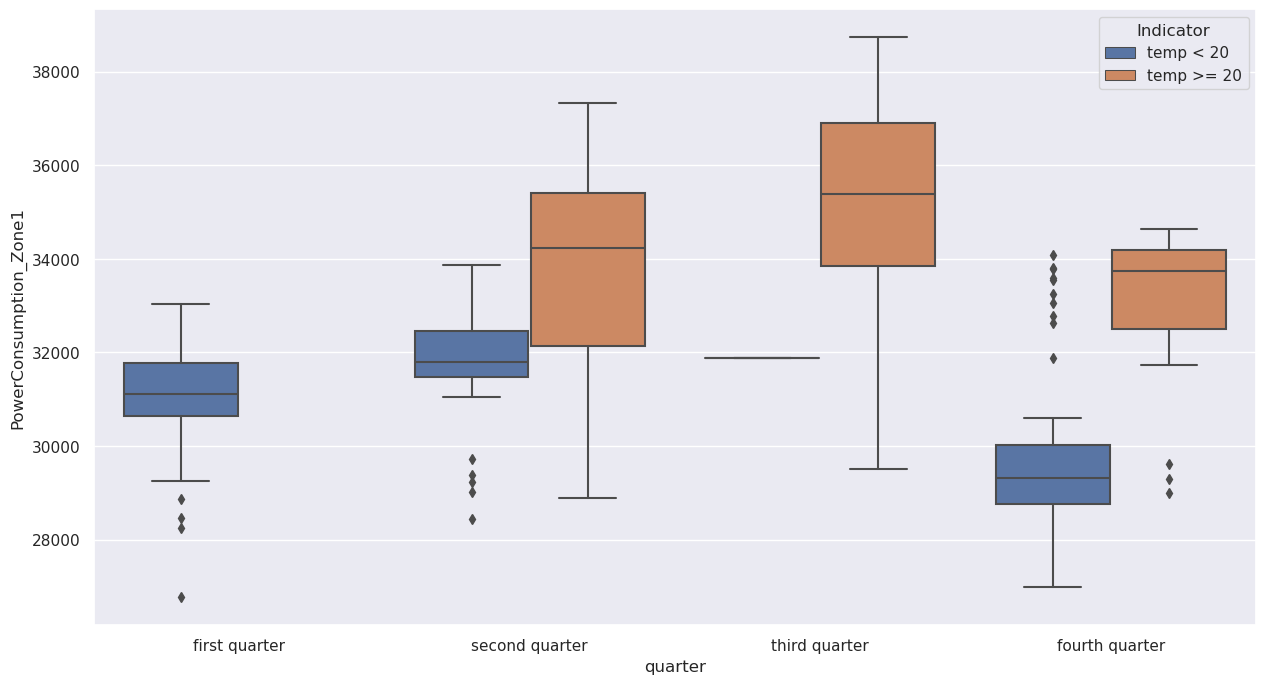

In [13]:
sns.boxplot(data = df, x = "quarter", y = "PowerConsumption_Zone1", hue = "Indicator")

### stripchart

In [14]:
data = data.reset_index() # сделаем индекс не в виде даты, а в стандартном представлении
data.head()

Datetime  Temperature   Humidity  WindSpeed  PowerConsumption_Zone1  \
0 2017-01-01     9.675299  68.519306   0.315146            28465.232067   
1 2017-01-02    12.476875  71.456319   0.076563            28869.493671   
2 2017-01-03    12.100000  74.981667   0.076715            30562.447257   
3 2017-01-04    10.509479  75.459792   0.082417            30689.831224   
4 2017-01-05    10.866444  71.040486   0.083896            30802.911393   

   Indicator        quarter  
0  temp < 20  first quarter  
1  temp < 20  first quarter  
2  temp < 20  first quarter  
3  temp < 20  first quarter  
4  temp < 20  first quarter

In [15]:
data.loc[:, "Month"] = data.loc[:, "Datetime"].apply(lambda x: x.strftime("%b"))

In [16]:
data["PowerConsumption_Zone1"] = data["PowerConsumption_Zone1"].apply(lambda x: (round(x/1000))*1000)
data.head()

Datetime  Temperature   Humidity  WindSpeed  PowerConsumption_Zone1  \
0 2017-01-01     9.675299  68.519306   0.315146                   28000   
1 2017-01-02    12.476875  71.456319   0.076563                   29000   
2 2017-01-03    12.100000  74.981667   0.076715                   31000   
3 2017-01-04    10.509479  75.459792   0.082417                   31000   
4 2017-01-05    10.866444  71.040486   0.083896                   31000   

   Indicator        quarter Month  
0  temp < 20  first quarter   Jan  
1  temp < 20  first quarter   Jan  
2  temp < 20  first quarter   Jan  
3  temp < 20  first quarter   Jan  
4  temp < 20  first quarter   Jan

In [19]:
data.to_csv('task2_stripchart.csv', index = False) # экспортирую данные, чтобы использовать их на R

<AxesSubplot:xlabel='Month', ylabel='Temperature'>

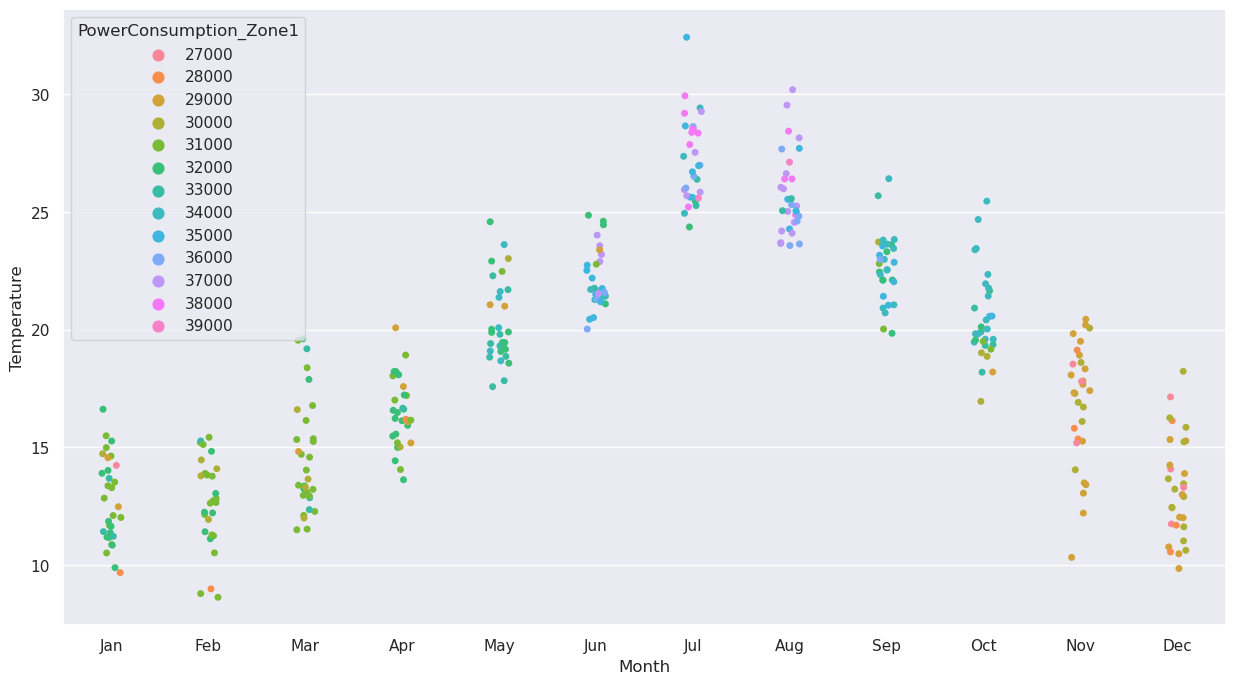

In [18]:
sns.stripplot(data=data, x="Month", y="Temperature", hue="PowerConsumption_Zone1")


## 3 Проверить, являются ли наблюдения выбросами с точки зрения формальных статистических критериев Граббса и Q-теста Диксона. Визуализировать результаты

In [20]:
data = pd.read_csv("powerconsumption.csv")
data["Datetime"] = pd.to_datetime(data["Datetime"])
data = (data.groupby(pd.Grouper(key='Datetime', freq='D')).mean())

In [21]:
data.head()

Temperature   Humidity  WindSpeed  GeneralDiffuseFlows  \
Datetime                                                             
2017-01-01     9.675299  68.519306   0.315146           121.390771   
2017-01-02    12.476875  71.456319   0.076563           120.404486   
2017-01-03    12.100000  74.981667   0.076715           120.686014   
2017-01-04    10.509479  75.459792   0.082417           122.959319   
2017-01-05    10.866444  71.040486   0.083896           118.749861   

            DiffuseFlows  PowerConsumption_Zone1  PowerConsumption_Zone2  \
Datetime                                                                   
2017-01-01     25.993924            28465.232067            17737.791287   
2017-01-02     27.227410            28869.493671            19557.725431   
2017-01-03     28.574660            30562.447257            20057.269504   
2017-01-04     28.827222            30689.831224            20102.077001   
2017-01-05     29.741437            30802.911393            20033.941237   

            PowerConsumption_Zone3  
Datetime                            
2017-01-01            17868.795181  
2017-01-02            17820.763053  
2017-01-03            17620.803213  
2017-01-04            17673.694779  
2017-01-05            17664.176707

In [22]:
df = data[["PowerConsumption_Zone1"]]
df.head()

PowerConsumption_Zone1
Datetime                          
2017-01-01            28465.232067
2017-01-02            28869.493671
2017-01-03            30562.447257
2017-01-04            30689.831224
2017-01-05            30802.911393

<AxesSubplot:xlabel='Datetime'>

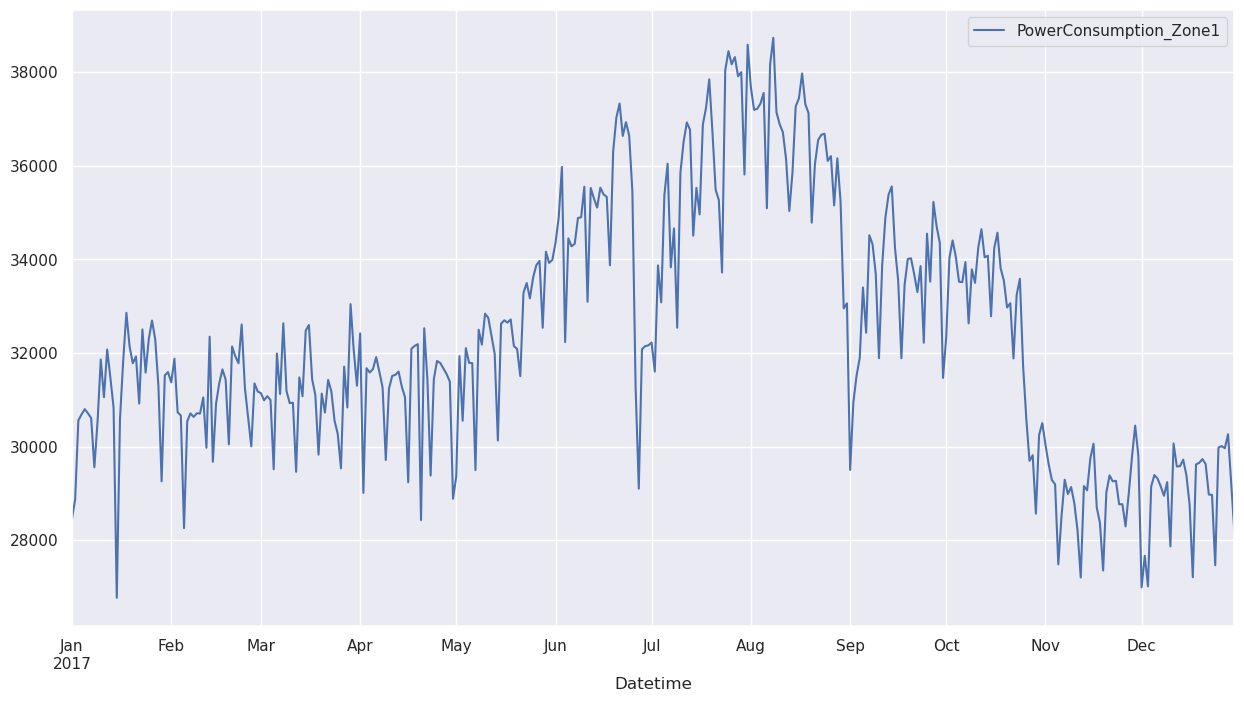

In [23]:
df.plot()

In [24]:
#возьмём срез, так как критерий Диксона создан для небольших выборок
df = df.loc['2017-06-01':'2017-06-30'] # июнь
df.head()

PowerConsumption_Zone1
Datetime                          
2017-06-01            34350.551876
2017-06-02            34905.960265
2017-06-03            35975.364239
2017-06-04            32234.701987
2017-06-05            34450.066225

In [27]:
df.to_csv('task3.csv', index = True) # экспортирую данные, чтобы использовать их на R

<AxesSubplot:xlabel='Datetime'>

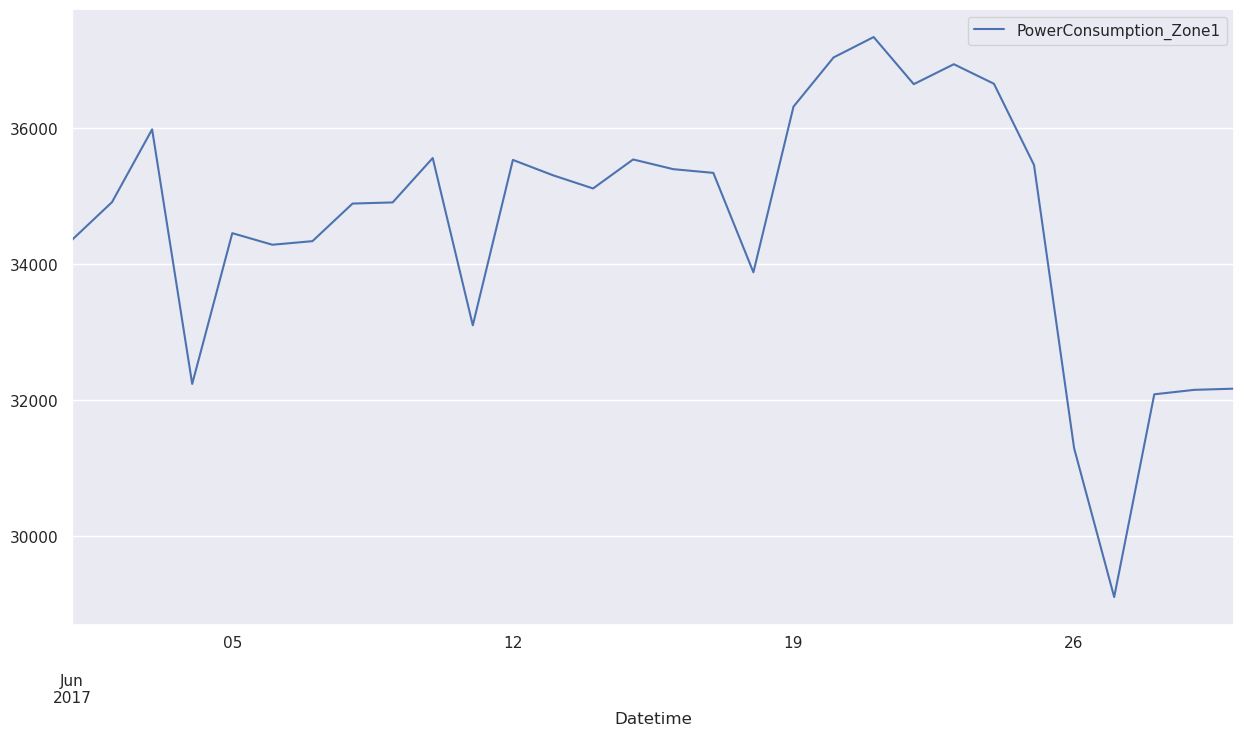

In [159]:
df.plot()

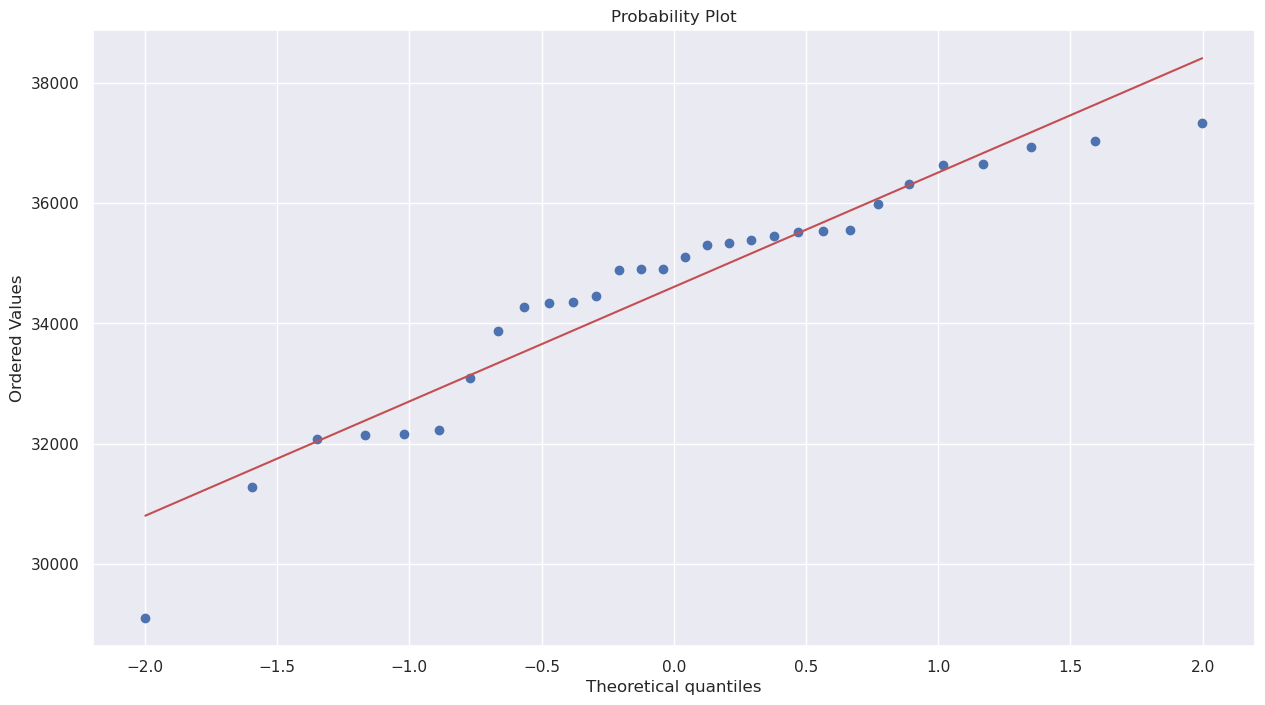

In [160]:
stat.probplot(df["PowerConsumption_Zone1"], plot = plt)
plt.show()

Можем видеть, что значения потребления энергии "PowerConsumption_Zone1" имеет нормальное распределение, по крайней мере очень похоже на это. Но есть некоторое значение, которое значительно отбивается от остальных измерений.

In [161]:
# применим критерий Граббса
Q_min = grubbs.min_test_outliers(np.array(df["PowerConsumption_Zone1"]), alpha=0.05)
Q_min 

[29103.664459375002]

Таким образом, выявили элемент, который не входит в 5% отклонения. Удалим данный элемент, и проверим есть ли другие, которые не входят в данный диапозон.

In [162]:
df_1 = df[df["PowerConsumption_Zone1"] != Q_min[0]]
grubbs.min_test_outliers(np.array(df_1["PowerConsumption_Zone1"]), alpha=0.05)

[]

Таких не нашлось. Значит, остальные измерения в пределах ожидаемой нормы.

In [163]:
# Q-тест Диксона
df = df.sort_values(by='PowerConsumption_Zone1', ascending=True) #сортируем по возрастанию исходные данные за июнь
x = np.array(df["PowerConsumption_Zone1"])
x

array([29103.66445938, 31291.65562889, 32082.47240653, 32148.07947   ,
       32165.60706431, 32234.7019866 , 33096.15894042, 33874.87858708,
       34280.08830021, 34332.53863111, 34350.55187625, 34450.06622542,
       34885.12141222, 34901.63355389, 34905.96026514, 35106.9315675 ,
       35300.6622516 , 35335.98234   , 35390.3752759 , 35451.65562917,
       35526.18101549, 35532.98013229, 35553.81898424, 35975.36423861,
       36308.96247222, 36639.20529826, 36645.29801319, 36932.36203104,
       37031.78807938, 37331.47902861])

Для подсчёта экспериментального значения будем пользоваться формулой 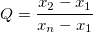

In [164]:
Q = (x[1] - x[0])/(x[-1] - x[0])
print('Q = ', Q)
Q_crit = 0.26  # табличное значение для выборки из 30 элементов
if Q >= Q_crit: 
    print(x[0], ' - выброс')
else: 
    print('выбросы не найдены')

Q =  0.26592616436627114
29103.664459375002  - выброс


Таким образом, критерий Диксона также определил минимальное значение как выброс.

## 4. Воспользоваться инструментами для заполнения пропусков в данных. Пропуски внести вручную и сравнить результаты заполнения с истинными значениями. 

In [3]:
data = pd.read_csv("powerconsumption.csv")
# удалим ненужные столбцы
data = data.drop(columns=["Humidity", "WindSpeed", "PowerConsumption_Zone2", "PowerConsumption_Zone3", "GeneralDiffuseFlows", "DiffuseFlows"], 
            axis=1)
data["Datetime"] = pd.to_datetime(data["Datetime"])
# сделаем шаг в выборке не 10 минут, а 1 день и усредним соотсветствующие значения
data = (data.groupby(pd.Grouper(key='Datetime', freq='D')).mean())
data = data.reset_index()
data = data.drop(columns=["Datetime"], axis=1)
data.head()

Temperature  PowerConsumption_Zone1
0     9.675299            28465.232067
1    12.476875            28869.493671
2    12.100000            30562.447257
3    10.509479            30689.831224
4    10.866444            30802.911393

In [4]:
# создадим по 30 пропусков в каждом столбце
miss_idx_Temp = np.random.choice(data.shape[0], 30, replace=False)
miss_idx_PC = np.random.choice(data.shape[0], 30, replace=False)
data_copy = data.copy()
data_copy['Temperature'] [miss_idx_Temp] = np.nan
data_copy['PowerConsumption_Zone1'][miss_idx_PC] = np.nan
data_copy

Temperature  PowerConsumption_Zone1
0       9.675299            28465.232067
1      12.476875            28869.493671
2      12.100000            30562.447257
3            NaN            30689.831224
4      10.866444            30802.911393
..           ...                     ...
359    11.621840            30013.476975
360          NaN            29966.962399
361    13.662361            30267.004647
362    12.990486            29209.632446
363    11.688993            28145.669624

[364 rows x 2 columns]

In [8]:
data.to_csv('task4.csv', index = False) # экспортирую данные, чтобы использовать их на R

In [167]:
# Заполним пропуски средним значением
data_copy["Temperature"].fillna(data_copy["Temperature"].mean(), inplace = True)
data_copy["PowerConsumption_Zone1"].fillna(data_copy["PowerConsumption_Zone1"].mean(), inplace = True)

In [168]:
#  сравним полученные значения с настоящими
print(r2_score(data['Temperature'][miss_idx_Temp], data_copy['Temperature'][miss_idx_Temp]))
print(r2_score(data['PowerConsumption_Zone1'][miss_idx_PC], data_copy['PowerConsumption_Zone1'][miss_idx_PC]))

-0.13015808630518233
-0.06222704195932427


Как видно из оценки r2 score устранение пропусков средним значением даёт далеко неточные результаты.

In [169]:
# Заполним пропуски медианным значением в тех же данных
data_copy = data.copy()
data_copy['Temperature'] [miss_idx_Temp] = np.nan
data_copy['PowerConsumption_Zone1'][miss_idx_PC] = np.nan

data_copy["Temperature"].fillna(data_copy["Temperature"].median(), inplace = True)
data_copy["PowerConsumption_Zone1"].fillna(data_copy["PowerConsumption_Zone1"].median(), inplace = True)

In [170]:
#  сравним полученные значения с настоящими
print(r2_score(data['Temperature'][miss_idx_Temp], data_copy['Temperature'][miss_idx_Temp]))
print(r2_score(data['PowerConsumption_Zone1'][miss_idx_PC], data_copy['PowerConsumption_Zone1'][miss_idx_PC]))

-0.17465720041766986
-0.16226905468645247


При заполнении пропусков медианным значением оплучили похожие результаты.

## 5. Сгенерировать данные из нормального распределения с различными параметрами и провести анализ с помощью графиков эмпирических функций распределений, квантилей, метода огибающих, а также стандартных процедур проверки гипотез о нормальности (критерии Колмогорова-Смирнова, ШапироУилка, Андерсона-Дарлинга, Крамера фон Мизеса, Колмогорова-Смирнова в модификации Лиллиефорса и Шапиро-Франсия). Рассмотреть выборки малого (не более 50-100 элементов) и умеренного (1000-5000 наблюдений) объемов.

In [171]:
#сгенерируем выборки с нормальным распределением
sample1 =  np.random.normal(-2, 1, 80)
sample2 =  np.random.normal(0, 3, 2500)

<AxesSubplot:ylabel='Proportion'>

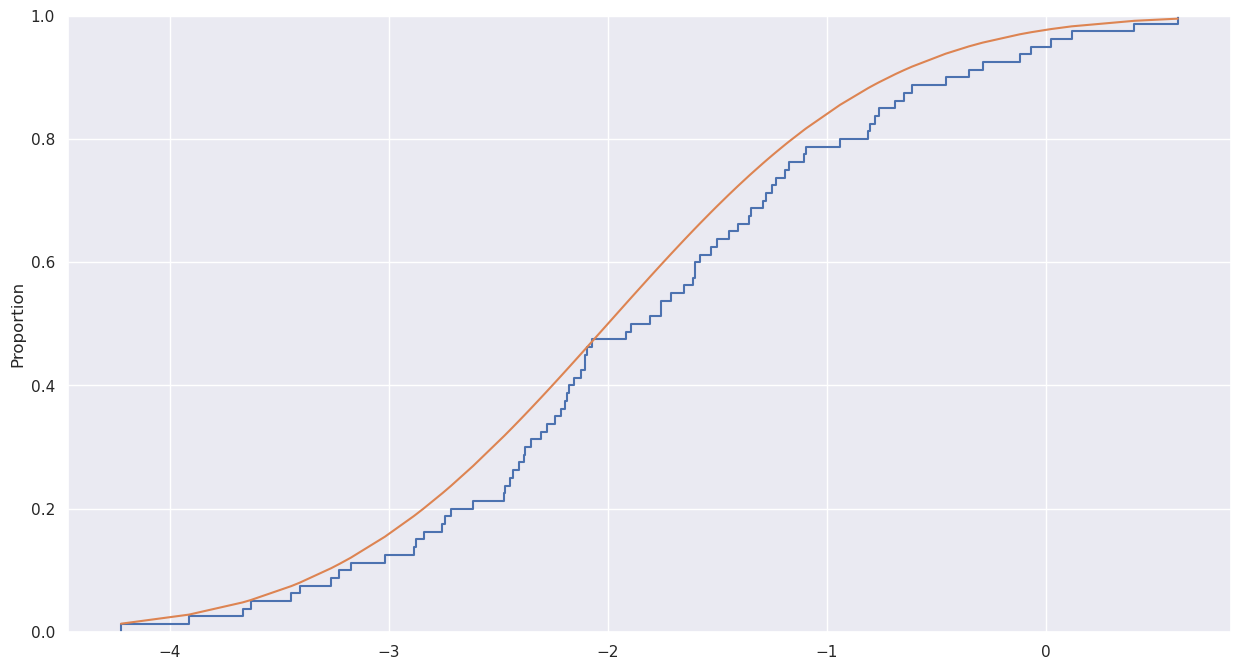

In [172]:
# график эмпирической функции для sample1
sns.ecdfplot(sample1) # эмпирическая функция распределения
sns.lineplot(x = sample1, y = stat.norm.cdf(sample1,  loc=-2, scale=1))

<AxesSubplot:ylabel='Proportion'>

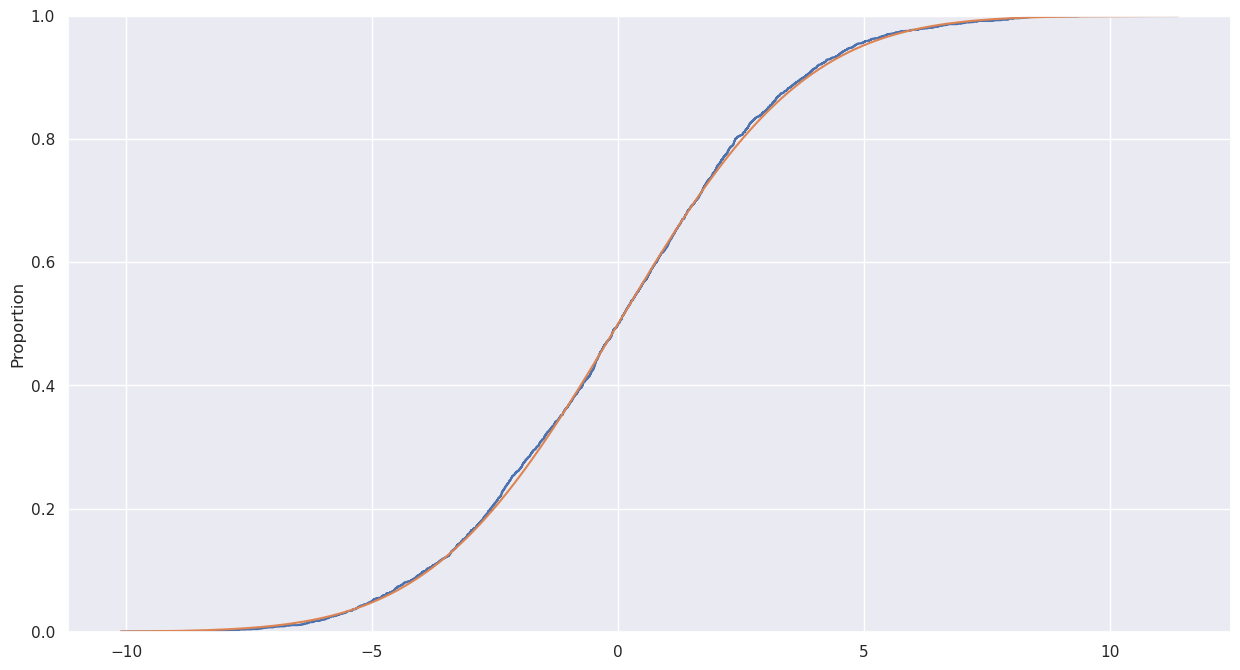

In [173]:
# график эмпирической функции для sample2
sns.ecdfplot(sample2) # эмпирическая функция распределения
sns.lineplot(x = sample2, y = stat.norm.cdf(sample2,  loc=0, scale=3))

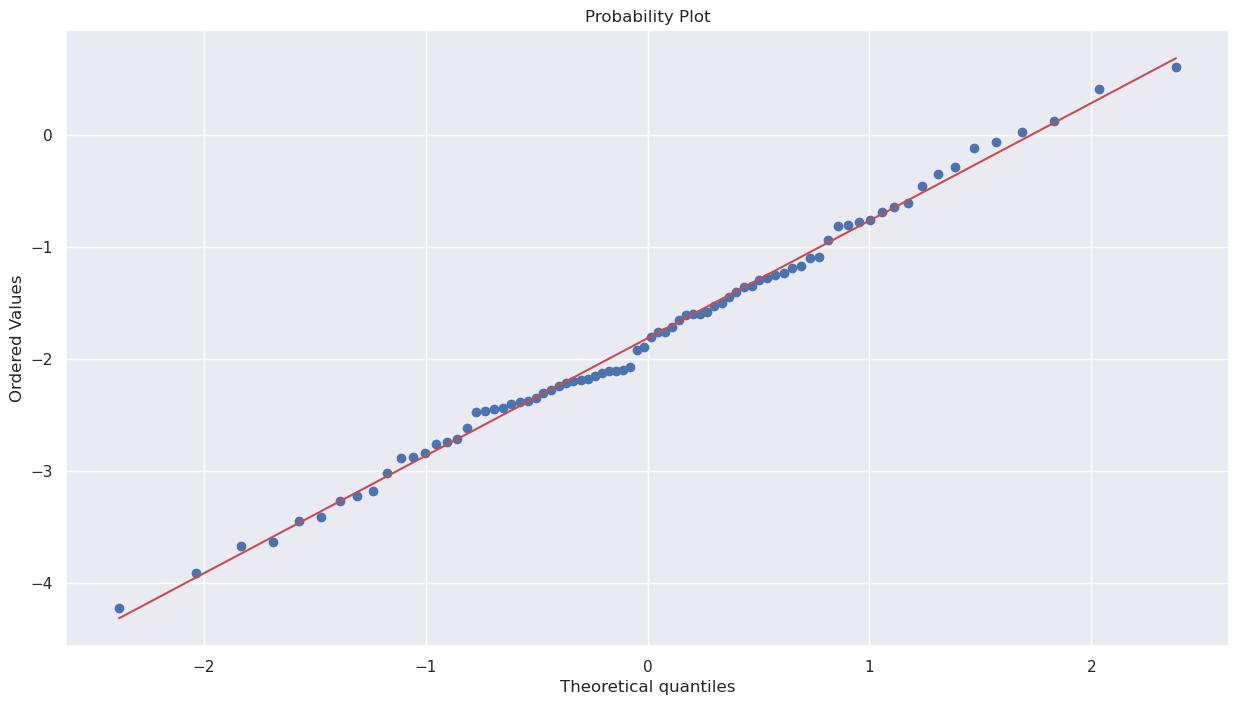

In [174]:
# метод квантилей для sample1
stat.probplot(sample1, dist="norm", plot=plt)
plt.show()

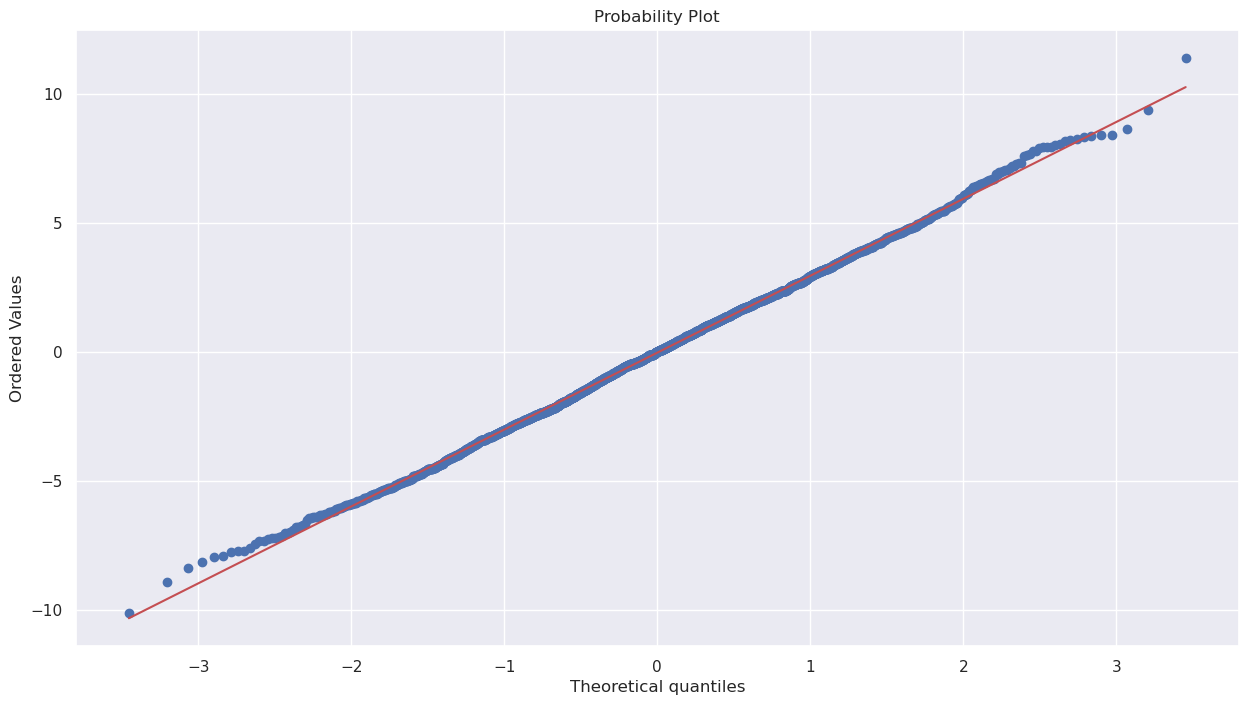

In [175]:
# метод квантилей для sample2
stat.probplot(sample2, dist="norm", plot=plt)
plt.show()

In [176]:
# критерий Колмогорова-Смирнова
print(stat.kstest(sample1, stat.norm.cdf, args = (-2, 1)))
print(stat.kstest(sample2, stat.norm.cdf, args = (0, 3)))

KstestResult(statistic=0.1056416906954363, pvalue=0.3115619167030746)
KstestResult(statistic=0.015759472447802625, pvalue=0.5583911302639135)


In [177]:
# критерий Шапиро-Уилка
print(stat.shapiro(sample1))
print(stat.shapiro(sample2))

ShapiroResult(statistic=0.9935686588287354, pvalue=0.9634059071540833)
ShapiroResult(statistic=0.9991204142570496, pvalue=0.26499974727630615)


In [178]:
# критерий Андерсона-Дарлинга
print(stat.anderson(sample1, dist='norm'))
print(stat.anderson(sample2, dist='norm'))

AndersonResult(statistic=0.1683519586518969, critical_values=array([0.551, 0.627, 0.752, 0.878, 1.044]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]))
AndersonResult(statistic=0.4463558936836307, critical_values=array([0.575, 0.655, 0.786, 0.917, 1.09 ]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]))


In [179]:
# критерий Крамера фон Мизеса
print(stat.cramervonmises(sample1, stat.norm.cdf, args=(-2, 1)))
print(stat.cramervonmises(sample2, stat.norm.cdf, args=(0, 3)))

CramerVonMisesResult(statistic=0.223897820736051, pvalue=0.22574924373988414)
CramerVonMisesResult(statistic=0.07542662168375289, pvalue=0.7187621461846642)


In [180]:
# критерий Колмогорова-Смирнова в модификации Лиллиефорса
print(lilliefors(sample1, dist='norm'))
print(lilliefors(sample2, dist='norm'))

(0.07322734473371245, 0.42725579661672103)
(0.01450616526081816, 0.24028109430020594)


## 6. Продемонстрировать пример анализа данных с помощью графиков квантилей, метода огибающих, а также стандартных процедур проверки гипотез о нормальности. Рассмотреть выборки малого и умеренного объемов.

In [19]:
# определим функцию для стандартизации значений
def standart_scale(arr):
    m = arr.mean()
    s = arr.std()
    return (arr - m)/s

data = pd.read_csv("powerconsumption.csv")
# удалим ненужные столбцы
data = data.drop(columns=["Temperature", "Humidity", "WindSpeed", "PowerConsumption_Zone2", "PowerConsumption_Zone3", "GeneralDiffuseFlows", "DiffuseFlows"], 
            axis=1)
data["Datetime"] = pd.to_datetime(data["Datetime"])
# сделаем шаг в выборке не 10 минут, а 1 день и усредним соотсветствующие значения
data = (data.groupby(pd.Grouper(key='Datetime', freq='D')).mean())
data = data.reset_index()
data = data.drop(columns=["Datetime"], axis=1)
data.head()

PowerConsumption_Zone1
0            28465.232067
1            28869.493671
2            30562.447257
3            30689.831224
4            30802.911393

In [20]:
# создадим выборку малого объёма из двух месяцев
sample1 = np.array(data.loc[60:119]['PowerConsumption_Zone1'])
sample1 = standart_scale(sample1)

In [29]:
smpl1 = pd.DataFrame(sample1)
smpl1.to_csv('task6_1.csv', index = False) # экспортирую данные, чтобы использовать их на R

<AxesSubplot:ylabel='Proportion'>

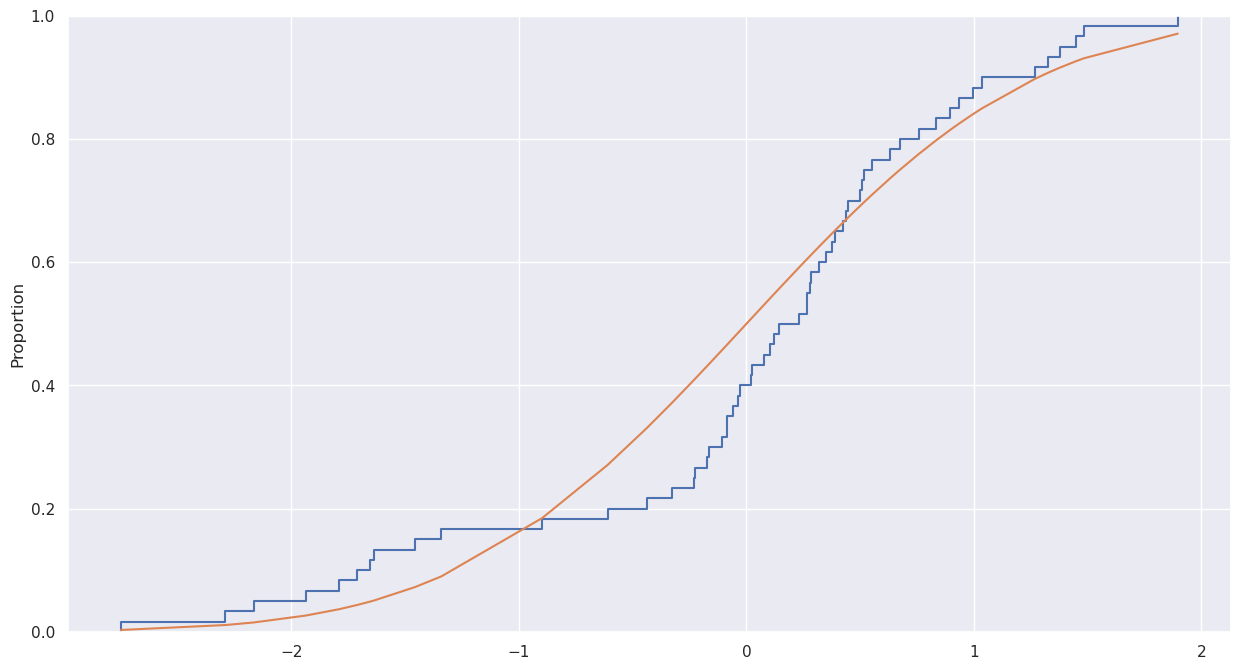

In [22]:
# график эмпирической функции для sample1
sns.ecdfplot(sample1) # эмпирическая функция распределения
sns.lineplot(x = sample1, y = stat.norm.cdf(sample1))

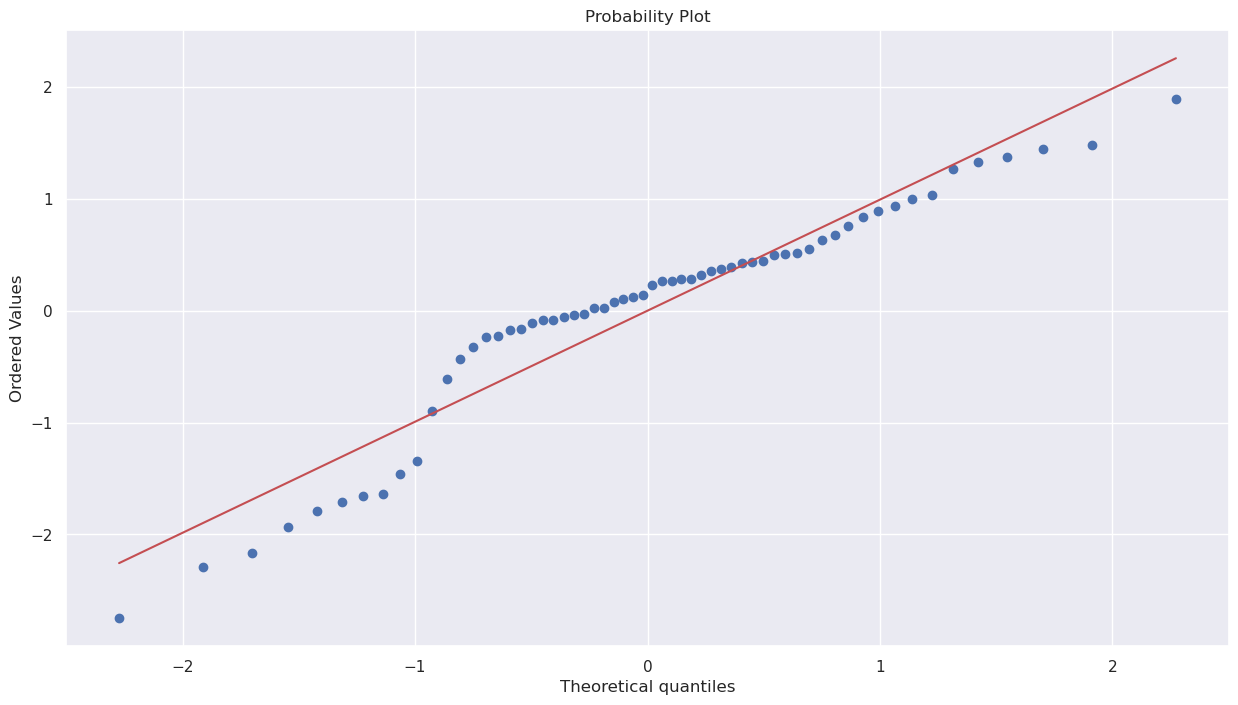

In [23]:
# метод квантилей для sample1
stat.probplot(sample1, dist="norm", plot=plt)
plt.show()

In [24]:
# критерий Колмогорова-Смирнова
print(stat.kstest(sample1, stat.norm.cdf))
# критерий Шапиро-Уилка
print(stat.shapiro(sample1))
# критерий Андерсона-Дарлинга
print(stat.anderson(sample1, dist='norm'))
# критерий Крамера фон Мизеса
print(stat.cramervonmises(sample1, stat.norm.cdf))
# критерий Колмогорова-Смирнова в модификации Лиллиефорса
print(lilliefors(sample1, dist='norm'))

KstestResult(statistic=0.1747767191097696, pvalue=0.044986668481835634)
ShapiroResult(statistic=0.9249551892280579, pvalue=0.001221191487275064)
AndersonResult(statistic=1.8743490317417724, critical_values=array([0.544, 0.619, 0.743, 0.866, 1.03 ]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]))
CramerVonMisesResult(statistic=0.34353733950997084, pvalue=0.1021673489628796)
(0.1755321108302808, 0.0009999999999998899)


In [25]:
data = pd.read_csv("powerconsumption.csv")
# удалим ненужные столбцы
data = data.drop(columns=["Datetime", "Temperature", "Humidity", "WindSpeed", "PowerConsumption_Zone2", "PowerConsumption_Zone3", "GeneralDiffuseFlows", "DiffuseFlows"], 
            axis=1)
data

PowerConsumption_Zone1
0                 34055.69620
1                 29814.68354
2                 29128.10127
3                 28228.86076
4                 27335.69620
...                       ...
52411             31160.45627
52412             30430.41825
52413             29590.87452
52414             28958.17490
52415             28349.80989

[52416 rows x 1 columns]

In [26]:
# создадим выборку умеренного объёма
sample2 = np.array(data.loc[1:2500]['PowerConsumption_Zone1'])
sample2 = standart_scale(sample2)

In [30]:
smpl2 = pd.DataFrame(sample2)
smpl2.to_csv('task6_2.csv', index = False) # экспортирую данные, чтобы использовать их на R

<AxesSubplot:ylabel='Proportion'>

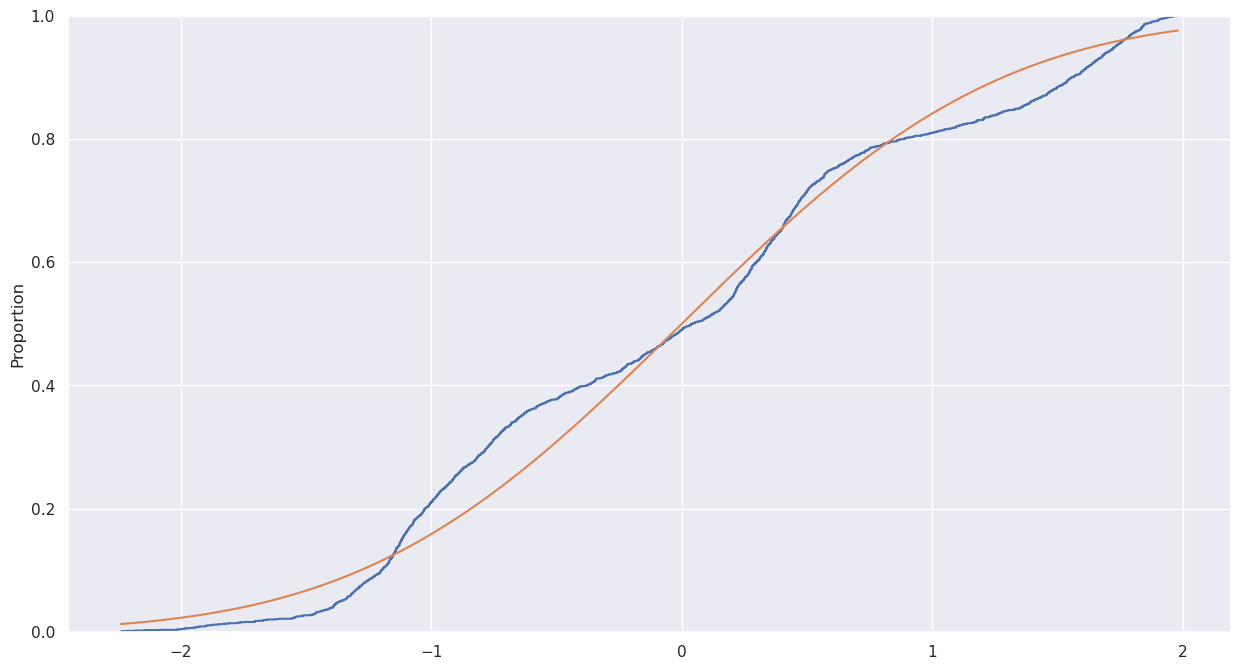

In [249]:
# график эмпирической функции для sample2
sns.ecdfplot(sample2) # эмпирическая функция распределения
sns.lineplot(x = sample2, y = stat.norm.cdf(sample2,  loc=0, scale=1))

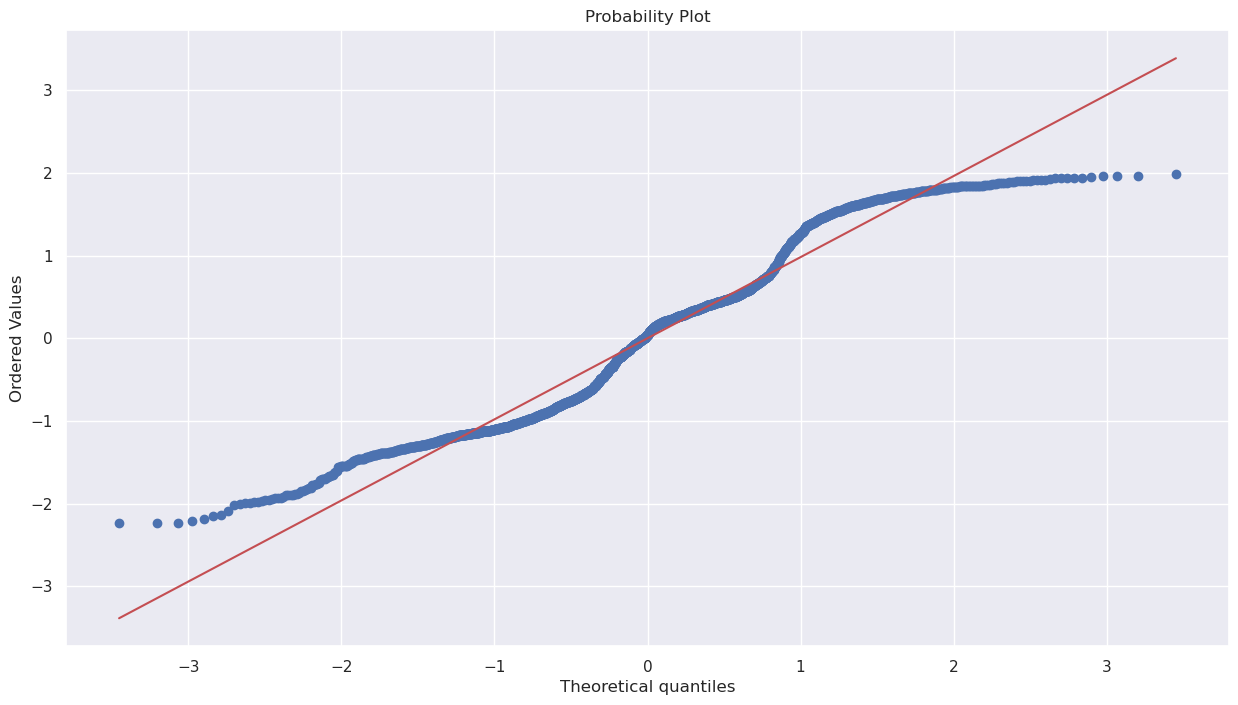

In [250]:
# метод квантилей для sample2
stat.probplot(sample2, dist="norm", plot=plt)
plt.show()

In [253]:
# критерий Колмогорова-Смирнова
print(stat.kstest(sample2, stat.norm.cdf, args = (0, 1)))
# критерий Шапиро-Уилка
print(stat.shapiro(sample2))
# критерий Андерсона-Дарлинга
print(stat.anderson(sample1, dist='norm'))
# критерий Крамера фон Мизеса
print(stat.cramervonmises(sample2, stat.norm.cdf, args=(0, 1)))
# критерий Колмогорова-Смирнова в модификации Лиллиефорса
print(lilliefors(sample2, dist='norm'))

KstestResult(statistic=0.09093892113694857, pvalue=1.928658666198314e-18)
ShapiroResult(statistic=0.9582608342170715, pvalue=3.2985901358561774e-26)
AndersonResult(statistic=1.8743490317417724, critical_values=array([0.544, 0.619, 0.743, 0.866, 1.03 ]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]))
CramerVonMisesResult(statistic=4.361321002651838, pvalue=7.616263175691529e-11)
(0.09089590224881555, 0.0009999999999998899)


## 7a. Критерий Стьюдента, включая односторонние варианты, когда проверяемая нулевая гипотеза заключается в том, что одно из сравниваемых средних значений больше (или меньше) другого. Реализовать оценку мощности критериев при заданном объеме выборки или определения объема выборки для достижения заданной мощности;

In [191]:
# возьмём данные аналогичные предыдущему заданию, просто возьмём оттуда ещё одну выборку
# определим функцию для стандартизации значений
def standart_scale(arr):
    m = arr.mean()
    s = arr.std()
    return (arr - m)/s

data = pd.read_csv("powerconsumption.csv")
# удалим ненужные столбцы
data = data.drop(columns=["Temperature", "Humidity", "WindSpeed", "PowerConsumption_Zone2", "PowerConsumption_Zone3", "GeneralDiffuseFlows", "DiffuseFlows"], 
            axis=1)
data["Datetime"] = pd.to_datetime(data["Datetime"])
# сделаем шаг в выборке не 10 минут, а 1 день и усредним соотсветствующие значения
data = (data.groupby(pd.Grouper(key='Datetime', freq='D')).mean())
data = data.reset_index()
data = data.drop(columns=["Datetime"], axis=1)
data

PowerConsumption_Zone1
0              28465.232067
1              28869.493671
2              30562.447257
3              30689.831224
4              30802.911393
..                      ...
359            30013.476975
360            29966.962399
361            30267.004647
362            29209.632446
363            28145.669624

[364 rows x 1 columns]

In [192]:
# создадим выборку малого объёма равную 30 дням
sample = np.array(data.loc[60:89]['PowerConsumption_Zone1'])
sample = standart_scale(sample)

# создадим тестовые выборки с нормальным распределением для проверки критерия Стьюдента
t_sample = [np.random.normal(0, 1, 30), np.random.normal(0.4, 1, 30), np.random.normal(-0.4, 2, 30)]

<AxesSubplot:ylabel='Proportion'>

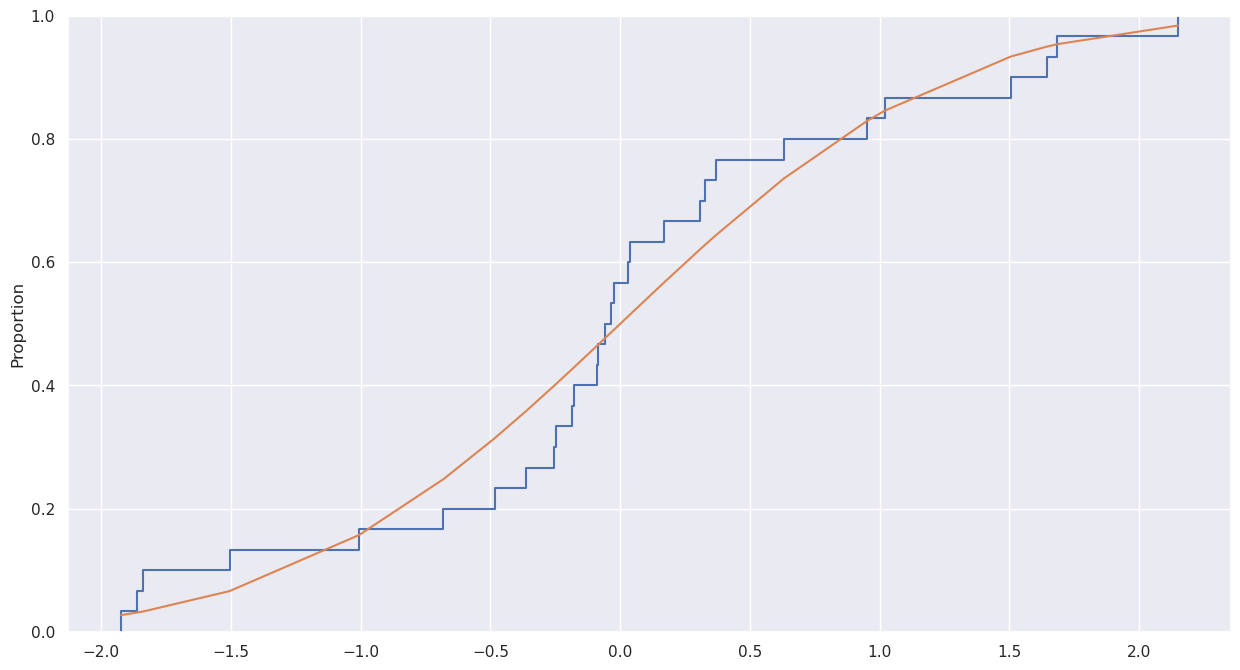

In [193]:
# график эмпирической функции для sample
sns.ecdfplot(sample) # эмпирическая функция распределения
sns.lineplot(x = sample, y = stat.norm.cdf(sample,  loc=0, scale=1))

По графику можем определить, что наша выборка данных будет иметь нормальное распределение N(0, 1)

In [194]:
alternative = ["two-sided", "less", "greater"]

In [195]:
# проверка гипотезы H0: среднее значение выборки sample отличается от 0
t_statistic, pvalue = stat.ttest_1samp(sample, 0, alternative=alternative[0])
print("p-value = ", pvalue)
print("H0: mean is ", alternative[0])
if pvalue >= 0.1:
    print("Гипотеза H0 принята с доверительным уровнем 0,9")
else: 
    print("Гипотеза H0 отвергнута с доверительным уровнем 0,9")
if pvalue >= 0.05:
    print("Гипотеза H0 принята с доверительным уровнем 0,95")
else: 
    print("Гипотеза H0 отвергнута с доверительным уровнем 0,95")
if pvalue >= 0.01:
    print("Гипотеза H0 принята с доверительным уровнем 0,99")
else: 
    print("Гипотеза H0 отвергнута с доверительным уровнем 0,99")

p-value =  0.9999999999999842
H0: mean is  two-sided
Гипотеза H0 принята с доверительным уровнем 0,9
Гипотеза H0 принята с доверительным уровнем 0,95
Гипотеза H0 принята с доверительным уровнем 0,99


In [196]:
# проверка гипотезы H0: среднее значение выборки sample меньше 0.4
t_statistic, pvalue = stat.ttest_1samp(sample, 0.4, alternative=alternative[1])
print("p-value = ", pvalue)
print("H0: mean is ", alternative[1])
if pvalue >= 0.1:
    print("Гипотеза H0 принята с доверительным уровнем 0,9")
else: 
    print("Гипотеза H0 отвергнута с доверительным уровнем 0,9")
if pvalue >= 0.05:
    print("Гипотеза H0 принята с доверительным уровнем 0,95")
else: 
    print("Гипотеза H0 отвергнута с доверительным уровнем 0,95")
if pvalue >= 0.01:
    print("Гипотеза H0 принята с доверительным уровнем 0,99")
else: 
    print("Гипотеза H0 отвергнута с доверительным уровнем 0,99")

p-value =  0.019839739562343174
H0: mean is  less
Гипотеза H0 отвергнута с доверительным уровнем 0,9
Гипотеза H0 отвергнута с доверительным уровнем 0,95
Гипотеза H0 принята с доверительным уровнем 0,99


In [197]:
# проверка гипотезы H0: среднее значение выборки sample больше -0.4
t_statistic, pvalue = stat.ttest_1samp(sample, -0.4, alternative=alternative[2])
print("p-value = ", pvalue)
print("H0: mean is ", alternative[2])
if pvalue >= 0.1:
    print("Гипотеза H0 принята с доверительным уровнем 0,9")
else: 
    print("Гипотеза H0 отвергнута с доверительным уровнем 0,9")
if pvalue >= 0.05:
    print("Гипотеза H0 принята с доверительным уровнем 0,95")
else: 
    print("Гипотеза H0 отвергнута с доверительным уровнем 0,95")
if pvalue >= 0.01:
    print("Гипотеза H0 принята с доверительным уровнем 0,99")
else: 
    print("Гипотеза H0 отвергнута с доверительным уровнем 0,99")

p-value =  0.019839739562341474
H0: mean is  greater
Гипотеза H0 отвергнута с доверительным уровнем 0,9
Гипотеза H0 отвергнута с доверительным уровнем 0,95
Гипотеза H0 принята с доверительным уровнем 0,99


Итог: по результатам тестов получили неоднозначные значения на разных доверительных уровнях.

In [198]:
# исследуем оценку мощности критерия
print(stat.ttest_ind(sample, t_sample[0], alternative = alternative[0]))
print(stat.ttest_ind(sample, t_sample[0], alternative = alternative[1]))
print(stat.ttest_ind(sample, t_sample[0], alternative = alternative[2]))
print()

print(stat.ttest_ind(sample, t_sample[1], alternative = alternative[0]))
print(stat.ttest_ind(sample, t_sample[1], alternative = alternative[1]))
print(stat.ttest_ind(sample, t_sample[1], alternative = alternative[2]))
print()

print(stat.ttest_ind(sample, t_sample[2], alternative = alternative[0]))
print(stat.ttest_ind(sample, t_sample[2], alternative = alternative[1]))
print(stat.ttest_ind(sample, t_sample[2], alternative = alternative[2]))

Ttest_indResult(statistic=-0.24511325253671526, pvalue=0.8072339339181678)
Ttest_indResult(statistic=-0.24511325253671526, pvalue=0.4036169669590839)
Ttest_indResult(statistic=-0.24511325253671526, pvalue=0.5963830330409161)

Ttest_indResult(statistic=-0.38486859932773687, pvalue=0.7017424837087021)
Ttest_indResult(statistic=-0.38486859932773687, pvalue=0.35087124185435103)
Ttest_indResult(statistic=-0.38486859932773687, pvalue=0.6491287581456489)

Ttest_indResult(statistic=1.6037255004380015, pvalue=0.11420685753644023)
Ttest_indResult(statistic=1.6037255004380015, pvalue=0.94289657123178)
Ttest_indResult(statistic=1.6037255004380015, pvalue=0.05710342876822012)


In [199]:
# Проведём оценку числа наблюдений
power = TTestPower() # one sample t-test
print(power.solve_power(0.4, power = 0.8, alpha = 0.05, alternative = "two-sided"))
print(power.solve_power(0.4, power = 0.8, alpha = 0.05, alternative = "larger"))

power = TTestIndPower() # two sample t-test
print(power.solve_power(0.4, power = 0.8, alpha = 0.05, alternative = "two-sided"))
print(power.solve_power(0.4, power = 0.8, alpha = 0.05, alternative = "larger"))

51.009448579637365
40.02907682056493
99.08032683981143
77.96726055659123


Таким образом, чтобы провести все выше упомнятые вариации критерия при
мощности в 80% необходимо как минимум 40 и 78 наблюдений.

## 7b. Уилкоксона-Манна-Уитни (ранговые)

In [200]:
# берём те же наборы данных, что и в 7a
# тест Уилкоксона
print(stat.wilcoxon(sample, t_sample[0]))
print(stat.wilcoxon(sample, t_sample[1]))

WilcoxonResult(statistic=225.0, pvalue=0.8871948085725307)
WilcoxonResult(statistic=192.0, pvalue=0.4161298982799053)


In [201]:
# тест Манна-Уитни
print(stat.mannwhitneyu(sample, t_sample[0]))
print(stat.mannwhitneyu(sample, t_sample[1]))

MannwhitneyuResult(statistic=438.0, pvalue=0.8649937061644875)
MannwhitneyuResult(statistic=409.0, pvalue=0.5493267842679926)


Итог: оба теста входят в 5% доверительный уровень, что соответствует нормальному распределению данных.

## 7c. Фишера, Левене, Бартлетта, Флигнера-Килина (проверка гипотез об однородности дисперсий).

In [202]:
 # Критерий Фишера
def Fisher(x, y):
    f = np.var(x)/np.var(y)
    nx = len(x)-1
    ny = len(y)-1
    p_value = 1-stat.f.cdf(f, nx, ny)
    return f, p_value
print(Fisher(sample, t_sample[0]))
print(Fisher(sample, t_sample[1]))

(1.6002377920797388, 0.10575928115056388)
(0.516866678556231, 0.9596209400880844)


In [203]:
# Критерий Левене
print(stat.levene(sample, t_sample[0], center = "mean"))
print(stat.levene(sample, t_sample[1], center = "mean"))
print(stat.levene(sample, t_sample[2], center = "mean"))

LeveneResult(statistic=0.5392543012901764, pvalue=0.46570045960422424)
LeveneResult(statistic=2.6050206350885734, pvalue=0.11195376283130797)
LeveneResult(statistic=8.957607947222446, pvalue=0.0040547534283674885)


Согласно тесту Левене, в 5% доверительный уровень входят только t_sample[0] и t_sample[1], значит, только у них дисперсия равна дисперсии sample, что соответствует действительнсоти.

In [204]:
# Критерий Бартлетта
print(stat.bartlett(sample, t_sample[0]))
print(stat.bartlett(sample, t_sample[1]))
print(stat.bartlett(sample, t_sample[2]))

BartlettResult(statistic=1.5611012411335425, pvalue=0.21150405022765403)
BartlettResult(statistic=3.0495394060258936, pvalue=0.08076004344440552)
BartlettResult(statistic=12.083415102946983, pvalue=0.0005087232789878475)


Критерий Батлетта имеет те же резултаты, что верно.

In [205]:
# Критерий Флигнера-Килина
print(stat.fligner(sample, t_sample[0], center = "mean"))
print(stat.fligner(sample, t_sample[1], center = "mean"))
print(stat.fligner(sample, t_sample[2], center = "mean"))

FlignerResult(statistic=0.3150512283810009, pvalue=0.5745969648293072)
FlignerResult(statistic=2.1434147590079777, pvalue=0.14318286666115906)
FlignerResult(statistic=8.067294703761046, pvalue=0.004507135874867867)


Критерий Флигнера-Килина имеет те же резултаты, что верно.

## 8. Исследовать корреляционные взаимосвязи в данных с помощью коэффициентов корреляции Пирсона, Спирмена и Кендалла.

In [206]:
data = pd.read_csv("powerconsumption.csv")
# удалим ненужные столбцы
data = data.drop(columns=["Humidity", "WindSpeed", "PowerConsumption_Zone2", "PowerConsumption_Zone3", "GeneralDiffuseFlows", "DiffuseFlows"], 
            axis=1)
data["Datetime"] = pd.to_datetime(data["Datetime"])
# сделаем шаг в выборке не 10 минут, а 1 день и усредним соотсветствующие значения
data = (data.groupby(pd.Grouper(key='Datetime', freq='D')).mean())
data

Temperature  PowerConsumption_Zone1
Datetime                                       
2017-01-01     9.675299            28465.232067
2017-01-02    12.476875            28869.493671
2017-01-03    12.100000            30562.447257
2017-01-04    10.509479            30689.831224
2017-01-05    10.866444            30802.911393
...                 ...                     ...
2017-12-26    11.621840            30013.476975
2017-12-27    15.232917            29966.962399
2017-12-28    13.662361            30267.004647
2017-12-29    12.990486            29209.632446
2017-12-30    11.688993            28145.669624

[364 rows x 2 columns]

<AxesSubplot:xlabel='Temperature', ylabel='PowerConsumption_Zone1'>

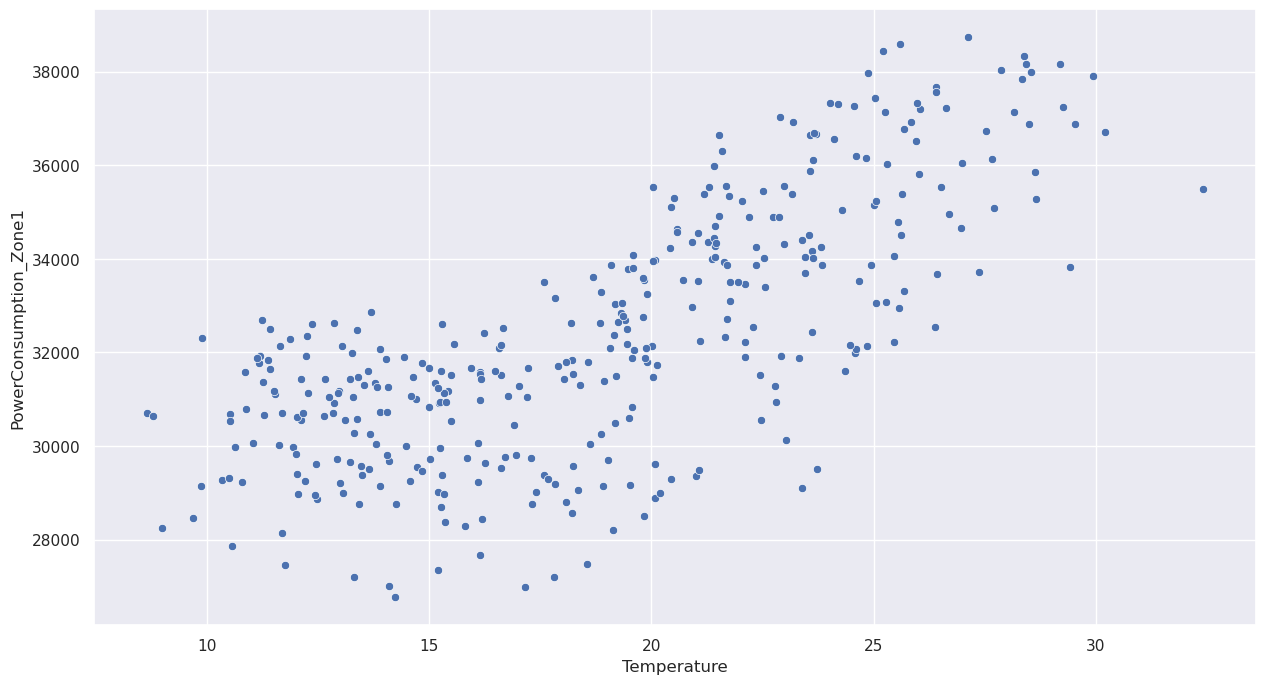

In [207]:
sns.scatterplot(data=data, x="Temperature", y="PowerConsumption_Zone1") 

Согласно графику, можем сделать вывод, что между потребляемой энергией и температурой воздуха имеется **линейная прямая высокая корреляция**. Проверим это с помощью коэффициентов корреляции.

In [208]:
# Коэффициент Пирсона
stat.pearsonr(data["Temperature"], data["PowerConsumption_Zone1"])

PearsonRResult(statistic=0.7346958743243912, pvalue=5.652714393656443e-63)

In [209]:
# Коэффициент Спирмена
stat.spearmanr(data["Temperature"], data["PowerConsumption_Zone1"])

SpearmanrResult(correlation=0.7238397965670693, pvalue=2.616154243819123e-60)

In [210]:
# Коэффициент Кендалла
stat.kendalltau(data["Temperature"], data["PowerConsumption_Zone1"])

KendalltauResult(correlation=0.5190869736324283, pvalue=1.8519136296706043e-49)

Итог: согласно коэффициентам Пирсона и Спирмена наблюдается линейная прямая высокая корреляция, а согласно коэффициенту Кендалла просто средняя, но всё-таки имеется.

## 9. Продемонстрировать использование методов хи-квадрат, точного теста Фишера, теста МакНемара, Кохрана-Мантеля-Хензеля.

In [211]:
data = pd.read_csv("powerconsumption.csv")
# удалим ненужные столбцы
data = data.drop(columns=["WindSpeed", "PowerConsumption_Zone2", "PowerConsumption_Zone3", "GeneralDiffuseFlows", "DiffuseFlows"], 
            axis=1)
data["Datetime"] = pd.to_datetime(data["Datetime"])
# сделаем шаг в выборке не 10 минут, а 1 день и усредним соотсветствующие значения
data = (data.groupby(pd.Grouper(key='Datetime', freq='D')).mean())
data.head()

Temperature   Humidity  PowerConsumption_Zone1
Datetime                                                  
2017-01-01     9.675299  68.519306            28465.232067
2017-01-02    12.476875  71.456319            28869.493671
2017-01-03    12.100000  74.981667            30562.447257
2017-01-04    10.509479  75.459792            30689.831224
2017-01-05    10.866444  71.040486            30802.911393

In [212]:
# найдём среднее потребление электроэнергии за весь год
data["PowerConsumption_Zone1"].mean()

32344.97056358593

In [213]:
# разобьём год на сезоны
df = data
df.loc[(data.index >= '2017-01-01') & (data.index < '2017-03-01'), "season"] = "winter"
df.loc[(data.index >= '2017-03-01') & (data.index < '2017-06-01'), "season"] = "spring"
df.loc[(data.index >= '2017-06-01') & (data.index < '2017-09-01'), "season"] = "summer"
df.loc[(data.index >= '2017-09-01') & (data.index < '2017-12-01'), "season"] = "autumn"
df.loc[(data.index >= '2017-12-01') & (data.index < '2017-12-31'), "season"] = "winter"
df.head()

Temperature   Humidity  PowerConsumption_Zone1  season
Datetime                                                          
2017-01-01     9.675299  68.519306            28465.232067  winter
2017-01-02    12.476875  71.456319            28869.493671  winter
2017-01-03    12.100000  74.981667            30562.447257  winter
2017-01-04    10.509479  75.459792            30689.831224  winter
2017-01-05    10.866444  71.040486            30802.911393  winter

In [214]:
# добавим показатель повышенного потребления электроэнергии
df.loc[data["PowerConsumption_Zone1"] >= 32000, "PC_mean"] = "PC>=32000"
df.loc[data["PowerConsumption_Zone1"] < 32000, "PC_mean"] = "PC<32000"
df.head()

Temperature   Humidity  PowerConsumption_Zone1  season   PC_mean
Datetime                                                                    
2017-01-01     9.675299  68.519306            28465.232067  winter  PC<32000
2017-01-02    12.476875  71.456319            28869.493671  winter  PC<32000
2017-01-03    12.100000  74.981667            30562.447257  winter  PC<32000
2017-01-04    10.509479  75.459792            30689.831224  winter  PC<32000
2017-01-05    10.866444  71.040486            30802.911393  winter  PC<32000

In [215]:
df1 = pd.crosstab(df["season"], df["PC_mean"])
df1

PC_mean  PC<32000  PC>=32000
season                      
autumn         45         46
spring         60         32
summer          3         89
winter         79         10

In [216]:
# Тест Хи-квадрат
chi2, p_value, dof, expected = stat.chi2_contingency(df1)
print("chi2 = ", chi2) 
print("p-value = ", p_value)

chi2 =  142.2510517624784
p-value =  1.236134838726313e-30


Итог: значение p-value слишаком мало, поэтому можем отвергнуть нулевую гипотезу о том, что повешенное потребление энергии не зависит от времени года, согласно тесту Хи-квадрат.

In [217]:
# Добавим ещё один критерий, связанный с температурой
df.loc[df["Temperature"] >= 20, "Indicator"] = "temp >= 20"
df.loc[df["Temperature"] < 20, "Indicator"] = "temp < 20"

df.loc[df["Humidity"] >= 65, "Hum"] = "high"
df.loc[df["Humidity"] < 65, "Hum"] = "low"
df.head()

Temperature   Humidity  PowerConsumption_Zone1  season   PC_mean  \
Datetime                                                                       
2017-01-01     9.675299  68.519306            28465.232067  winter  PC<32000   
2017-01-02    12.476875  71.456319            28869.493671  winter  PC<32000   
2017-01-03    12.100000  74.981667            30562.447257  winter  PC<32000   
2017-01-04    10.509479  75.459792            30689.831224  winter  PC<32000   
2017-01-05    10.866444  71.040486            30802.911393  winter  PC<32000   

            Indicator   Hum  
Datetime                     
2017-01-01  temp < 20  high  
2017-01-02  temp < 20  high  
2017-01-03  temp < 20  high  
2017-01-04  temp < 20  high  
2017-01-05  temp < 20  high

In [218]:
# таблица сопряжённости температуры и потребления электроэнергии
df2 = pd.crosstab(df["Indicator"], df["PC_mean"])
df2

PC_mean     PC<32000  PC>=32000
Indicator                      
temp < 20        167         44
temp >= 20        20        133

In [219]:
# Точный тест Фишера
stat.fisher_exact(df2)

(25.239772727272726, 3.7548786035087933e-38)

Итог: p-value слишком мало, тогда можем отвергнуть нулевую гипотезу, что повышенное потребление энергии не связано с температурой.

In [220]:
# теперь создадим таблицу сопряжённости температуры и влажности
df3 = pd.crosstab(df["Indicator"], df["Hum"])
df3

Hum         high  low
Indicator            
temp < 20    154   57
temp >= 20    76   77

In [221]:
# Тест МакНемара
print(mcnemar(df3))

pvalue      1.0
statistic   0.0


In [222]:
# Тест Кохрана-Мантеля-Хензеля
# Гипотеза H0: потребление электроэнергии не зависит от влажности, разделение проводим по температуре
CMH(df[["Hum", "PC_mean", "Indicator"]], "Hum", "PC_mean", stratifier = "Indicator")

Cochran-Mantel-Haenszel Chi2 test

"Hum" x "PC_mean", stratified by "Indicator"

Cochran-Mantel-Haenszel M^2 = 5.42557, dof = 1, p-value = 0.0198

Итог: гипотезу можно опровергнуть на доверительном уровне 0.95, но принять на 0.99.

## 10. Проверить наличие мультиколлинеарности в данных с помощью корреляционной матрицы и фактора инфляции дисперсии.

In [223]:
data = pd.read_csv("powerconsumption.csv")
# удалим ненужные столбцы
data = data.drop(columns=["PowerConsumption_Zone2", "PowerConsumption_Zone3", "GeneralDiffuseFlows", "DiffuseFlows"], 
            axis=1)
data["Datetime"] = pd.to_datetime(data["Datetime"])
# сделаем шаг в выборке не 10 минут, а 1 день и усредним соотсветствующие значения
data = (data.groupby(pd.Grouper(key='Datetime', freq='D')).mean())
data

Temperature   Humidity  WindSpeed  PowerConsumption_Zone1
Datetime                                                             
2017-01-01     9.675299  68.519306   0.315146            28465.232067
2017-01-02    12.476875  71.456319   0.076563            28869.493671
2017-01-03    12.100000  74.981667   0.076715            30562.447257
2017-01-04    10.509479  75.459792   0.082417            30689.831224
2017-01-05    10.866444  71.040486   0.083896            30802.911393
...                 ...        ...        ...                     ...
2017-12-26    11.621840  69.070903   0.083062            30013.476975
2017-12-27    15.232917  59.445903   0.082028            29966.962399
2017-12-28    13.662361  62.839375   0.081354            30267.004647
2017-12-29    12.990486  49.078750   0.078181            29209.632446
2017-12-30    11.688993  51.361667   0.078174            28145.669624

[364 rows x 4 columns]

In [224]:
# Выведем матрицу корреляции
data.corr()

Temperature  Humidity  WindSpeed  \
Temperature                1.000000 -0.311480   0.561112   
Humidity                  -0.311480  1.000000  -0.171981   
WindSpeed                  0.561112 -0.171981   1.000000   
PowerConsumption_Zone1     0.734696 -0.208269   0.468108   

                        PowerConsumption_Zone1  
Temperature                           0.734696  
Humidity                             -0.208269  
WindSpeed                             0.468108  
PowerConsumption_Zone1                1.000000

<AxesSubplot:>

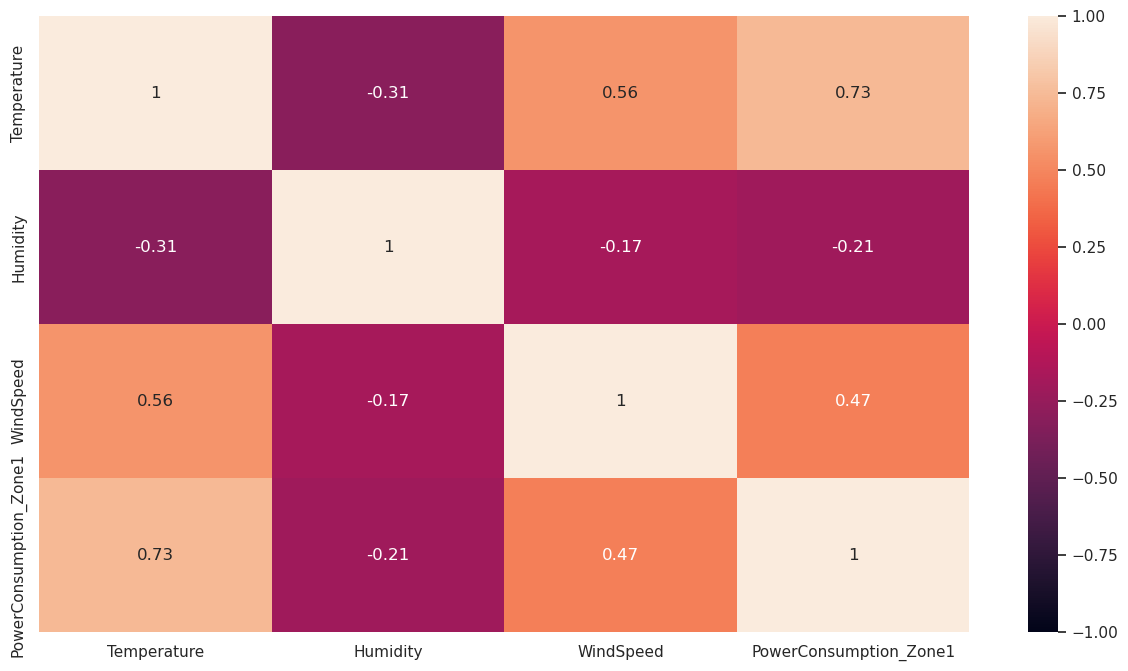

In [225]:
# Визуализируем её с помощью цветов
sns.heatmap(data.corr(), vmin = -1, vmax = 1, annot=True)

Таким образом, наблюдается высокая прямая корреляция между Temperature и Windspeed, Temperature и  PowerConsumption_Zone1, более низкая между PowerConsumption_Zone1 и Windspeed.  
А между Humidity и Temperature, windspeed и Humidity, PowerConsumption_Zone1 и Humidity слабая обратная корреляция.  

In [226]:
# фактор инфляции дисперсии
pd.Series([variance_inflation_factor(data.values, i) for i in range(len(data.columns))],
          index=data.columns)

Temperature               34.275670
Humidity                  32.819364
WindSpeed                  2.565665
PowerConsumption_Zone1    87.492647
dtype: float64

Итог: Видим крайне высокую зависимость температуры, влажности и потребления электроэнергии от других переменных, по факту высоких значения VIF, то есть получили высокую мультиколлинеарность модели.

## 11. Исследовать зависимости в данных с помощью дисперсионного анализа.

In [227]:
data = pd.read_csv("powerconsumption.csv")
# удалим ненужные столбцы
data = data.drop(columns=["Temperature", "Humidity", "WindSpeed", "PowerConsumption_Zone2", "PowerConsumption_Zone3", "GeneralDiffuseFlows", "DiffuseFlows"], 
            axis=1)
data["Datetime"] = pd.to_datetime(data["Datetime"])
# сделаем шаг в выборке не 10 минут, а 1 день и усредним соотсветствующие значения
data = (data.groupby(pd.Grouper(key='Datetime', freq='D')).mean())

data["PowerConsumption_Zone1"] = data["PowerConsumption_Zone1"].apply(lambda x: (round(x/1000))*1000)
data.head()

PowerConsumption_Zone1
Datetime                          
2017-01-01                   28000
2017-01-02                   29000
2017-01-03                   31000
2017-01-04                   31000
2017-01-05                   31000

In [228]:
# разобьём год на сезоны
df = data
df.loc[(data.index >= '2017-01-01') & (data.index < '2017-03-01'), "season"] = "winter"
df.loc[(data.index >= '2017-03-01') & (data.index < '2017-06-01'), "season"] = "spring"
df.loc[(data.index >= '2017-06-01') & (data.index < '2017-09-01'), "season"] = "summer"
df.loc[(data.index >= '2017-09-01') & (data.index < '2017-12-01'), "season"] = "autumn"
df.loc[(data.index >= '2017-12-01') & (data.index < '2017-12-31'), "season"] = "winter"

df.head()

PowerConsumption_Zone1  season
Datetime                                  
2017-01-01                   28000  winter
2017-01-02                   29000  winter
2017-01-03                   31000  winter
2017-01-04                   31000  winter
2017-01-05                   31000  winter

In [229]:
df1 = pd.crosstab(df["PowerConsumption_Zone1"], df["season"])
df1

season                  autumn  spring  summer  winter
PowerConsumption_Zone1                                
27000                        3       0       0       5
28000                        3       1       0       5
29000                       18       7       1      13
30000                       11       6       0      17
31000                        4      27       1      28
32000                        9      31       6      17
33000                        8      14       5       4
34000                       26       6       8       0
35000                        8       0      19       0
36000                        1       0      15       0
37000                        0       0      24       0
38000                        0       0      11       0
39000                        0       0       2       0

In [230]:
fvalue, pvalue = stat.f_oneway(df1["autumn"], df1["spring"], df1["summer"], df1["winter"])
print(fvalue)
print(pvalue)

0.0019253138662709078
0.9998816558878864


Итог: нулевая гипотиза поддтверждается, а значит, указанные группы сезона года имеют одинковое среднее значение генеральной совокупности.